## Regularización Redes Neuronales


El Dataset usado corresponde a información recolectada de un grupo de 30 voluntarios dentro de un rango de edad de 19-48 años. Cada persona realizó seis actividades:

1. WALKING,
2. WALKING_UPSTAIRS
3. WALKING_DOWNSTAIRS
4. SITTING
5. STANDING
6. LAYING

usando un teléfono inteligente (Samsung Galaxy S II) en la cintura. Con su acelerómetro y giroscopio integrados, se capturó la aceleración lineal 3-axial y la velocidad angular 3-axial a una velocidad constante de 50Hz.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

import pandas as pd

from sklearn.metrics import f1_score
import sklearn.neural_network

In [2]:
data = pd.read_csv('smartphone_activity_dataset.csv')

predictors = list(data.keys())
predictors.remove('activity')

scaler = StandardScaler()


In [33]:
mlp_sm = sklearn.neural_network.MLPClassifier(activation='logistic', 
                                           hidden_layer_sizes=(4,4,4), 
                                           max_iter=1750)
mlp_rl = sklearn.neural_network.MLPClassifier(activation='relu', 
                                           hidden_layer_sizes=(4,4,4), 
                                           max_iter=1750)

# Insidencia Número de datos

In [34]:
train_size = np.linspace(0.1,0.9,9)

F1_train_sm = np.zeros(np.shape(train_size))
F1_test_sm  = np.zeros(np.shape(train_size))
F1_train_rl = np.zeros(np.shape(train_size))
F1_test_rl  = np.zeros(np.shape(train_size))

x_train, x_test, y_train, y_test = train_test_split(data[predictors], 
                                                    data['activity'], 
                                                    train_size=0.5)

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
for i in range(np.shape(train_size)[0]):
    
    tamano = int(np.shape(x_train)[0]*train_size[i])

    mlp_sm.fit(x_train[:tamano], y_train[:tamano])
    mlp_rl.fit(x_train[:tamano], y_train[:tamano])
    
    F1_train_sm[i] = f1_score(y_train[:tamano], mlp_sm.predict(x_train[:tamano]), average='macro')
    F1_test_sm[i]  = f1_score(y_test[:tamano], mlp_sm.predict(x_test[:tamano]), average='macro')
    F1_train_rl[i]  = f1_score(y_train[:tamano], mlp_rl.predict(x_train[:tamano]), average='macro')
    F1_test_rl[i]     = f1_score(y_test[:tamano], mlp_rl.predict(x_test[:tamano]), average='macro')
    print(train_size[i])

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.1
0.2
0.30000000000000004


C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.4
0.5
0.6
0.7000000000000001
0.8
0.9


Text(0, 0.5, 'F1 score')

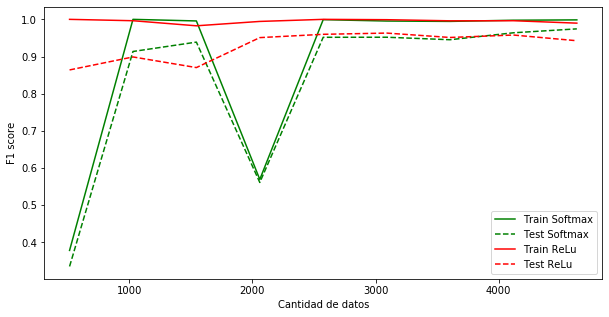

In [40]:
plt.figure(figsize=(10,5))
plt.plot(train_size*np.shape(x_train)[0], F1_train_sm, 'g',label = 'Train Softmax')
plt.plot(train_size*np.shape(x_train)[0], F1_test_sm, 'g--', label = 'Test Softmax')
plt.plot(train_size*np.shape(x_train)[0], F1_train_rl, 'r', label = 'Train ReLu')
plt.plot(train_size*np.shape(x_train)[0], F1_test_rl,'r--', label = 'Test ReLu')
plt.legend()
plt.xlabel('Cantidad de datos')
plt.ylabel('F1 score')

La cantidad de datos interfiere en el resultado de la clasificación final. De acuerdo con los resultados, si se toman mas datos el resultado de F1 aumenta, De igual forma, existen diferencias en los resutados utilizando como activador Softmax o ReLu. Independientemente del número de datos ReLu parece ser la que obtiene los mejores resultados para los datos de prueba. Por otro lado, Softmax tiene un mal desempeño si se usa con pocos datos.

# Insidencia parametro de regularización ($\alpha$)

In [ ]:
alpha = np.logspace(-5,1.5, 10)
F1_alpha_train = np.zeros(np.shape(alpha))
F1_alpha_test = np.zeros(np.shape(alpha))
for i in range(np.shape(alpha)[0]):
    mlp = sklearn.neural_network.MLPClassifier(activation='relu', 
                                           hidden_layer_sizes=(4,4,4), 
                                           max_iter=1750,
                                            alpha = alpha[i])
    
    mlp.fit(x_train, y_train)
    F1_alpha_train[i] = f1_score(y_train, mlp.predict(x_train), average='macro')
    F1_alpha_test[i]  = f1_score(y_test, mlp.predict(x_test), average='macro')

Text(0, 0.5, 'F1 score')

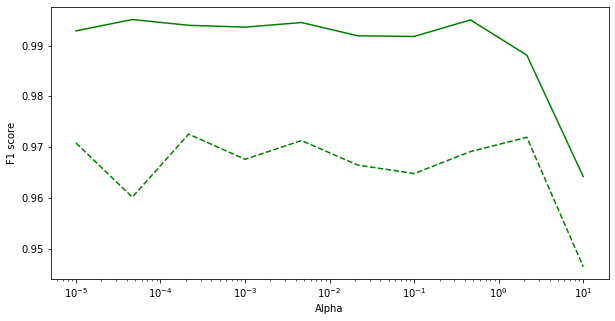

In [48]:
plt.figure(figsize = (10,5))
plt.semilogx(alpha, F1_alpha_train, 'g', label = 'train')
plt.semilogx(alpha, F1_alpha_test, 'g--', label = 'test')
plt.xlabel('Alpha')
plt.ylabel('F1 score')


Los resultados de F1 se mantienen estables con valores pequeños de $\alpha$ (entre $10^{-5}$ y $10^{-1}$). Sin embargo, despues de sobrepasar esos valores, el desempeño disminuye. 